In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob


In [3]:
#Glob away all the fits in a dir
fits_list = glob.glob("/home/kevin/aufklarung_astro_station/sdss_spectra/sky_flux/sdss_fits_files/*.fits") #"/home/kevin/WORK/coding/sdsswork/sdss_spectra/sky_flux/sdss_fits_files/*.fits")
 #glob.glob("sdss_fits_files/*.fits")

#Extra the fits tables from all the globbed fits
specdata_list=[]
for i in fits_list:
    with fits.open(i) as fit_file:
        specdata=fit_file[1].data
        header=fit_file[0].header
        specdata_list.append(specdata)


#Get the shapes of each spectra then find the smallest shape along 0 axis
spec_shape_list=[]
for i in specdata_list:
    spec_shape_list.append(i.shape)

spec_shape_list=np.array(spec_shape_list)
smallest_spec=np.min(spec_shape_list)

loglam_vals=specdata_list[1]['loglam']  
loglam_low=loglam_vals[1+300]
loglam_hi=loglam_vals[-1-300]


spec1=specdata_list[1]
mask1=(spec1.loglam>=loglam_low) & (spec1.loglam<=loglam_hi)
spec1_m=spec1[mask1]
target_length = np.int64(spec1_m.shape[0])



target_length = np.int64(spec1_m.shape[0])
spectra_filtered_list = []
for i in specdata_list:
    spec = i
    mask=(spec.loglam>=loglam_low) & (spec.loglam<=loglam_hi)
    filtered_data = spec[mask]
    if len(filtered_data) < target_length:
        filtered_data = np.pad(filtered_data, (0, target_length - len(filtered_data)), constant_values=np.mean(filtered_data['sky'])) 
    elif len(filtered_data) > target_length:
        filtered_data = filtered_data[:target_length]

    spectra_filtered_list.append(filtered_data)
    
spectra_filtered_list = np.array(spectra_filtered_list)

mean_sky=np.mean(spectra_filtered_list['sky'], axis=0)
wavelength=spectra_filtered_list['loglam'][1]

In [29]:
sky_spectra=spectra_filtered_list['sky']
residual= (sky_spectra-mean_sky)
centered_spectra=residual


from sklearn.decomposition import PCA
n_components = sky_spectra.shape[0]  # Number of components to retain
pca = PCA(n_components=n_components)
pca.fit_transform(centered_spectra)
pca_components = pca.components_


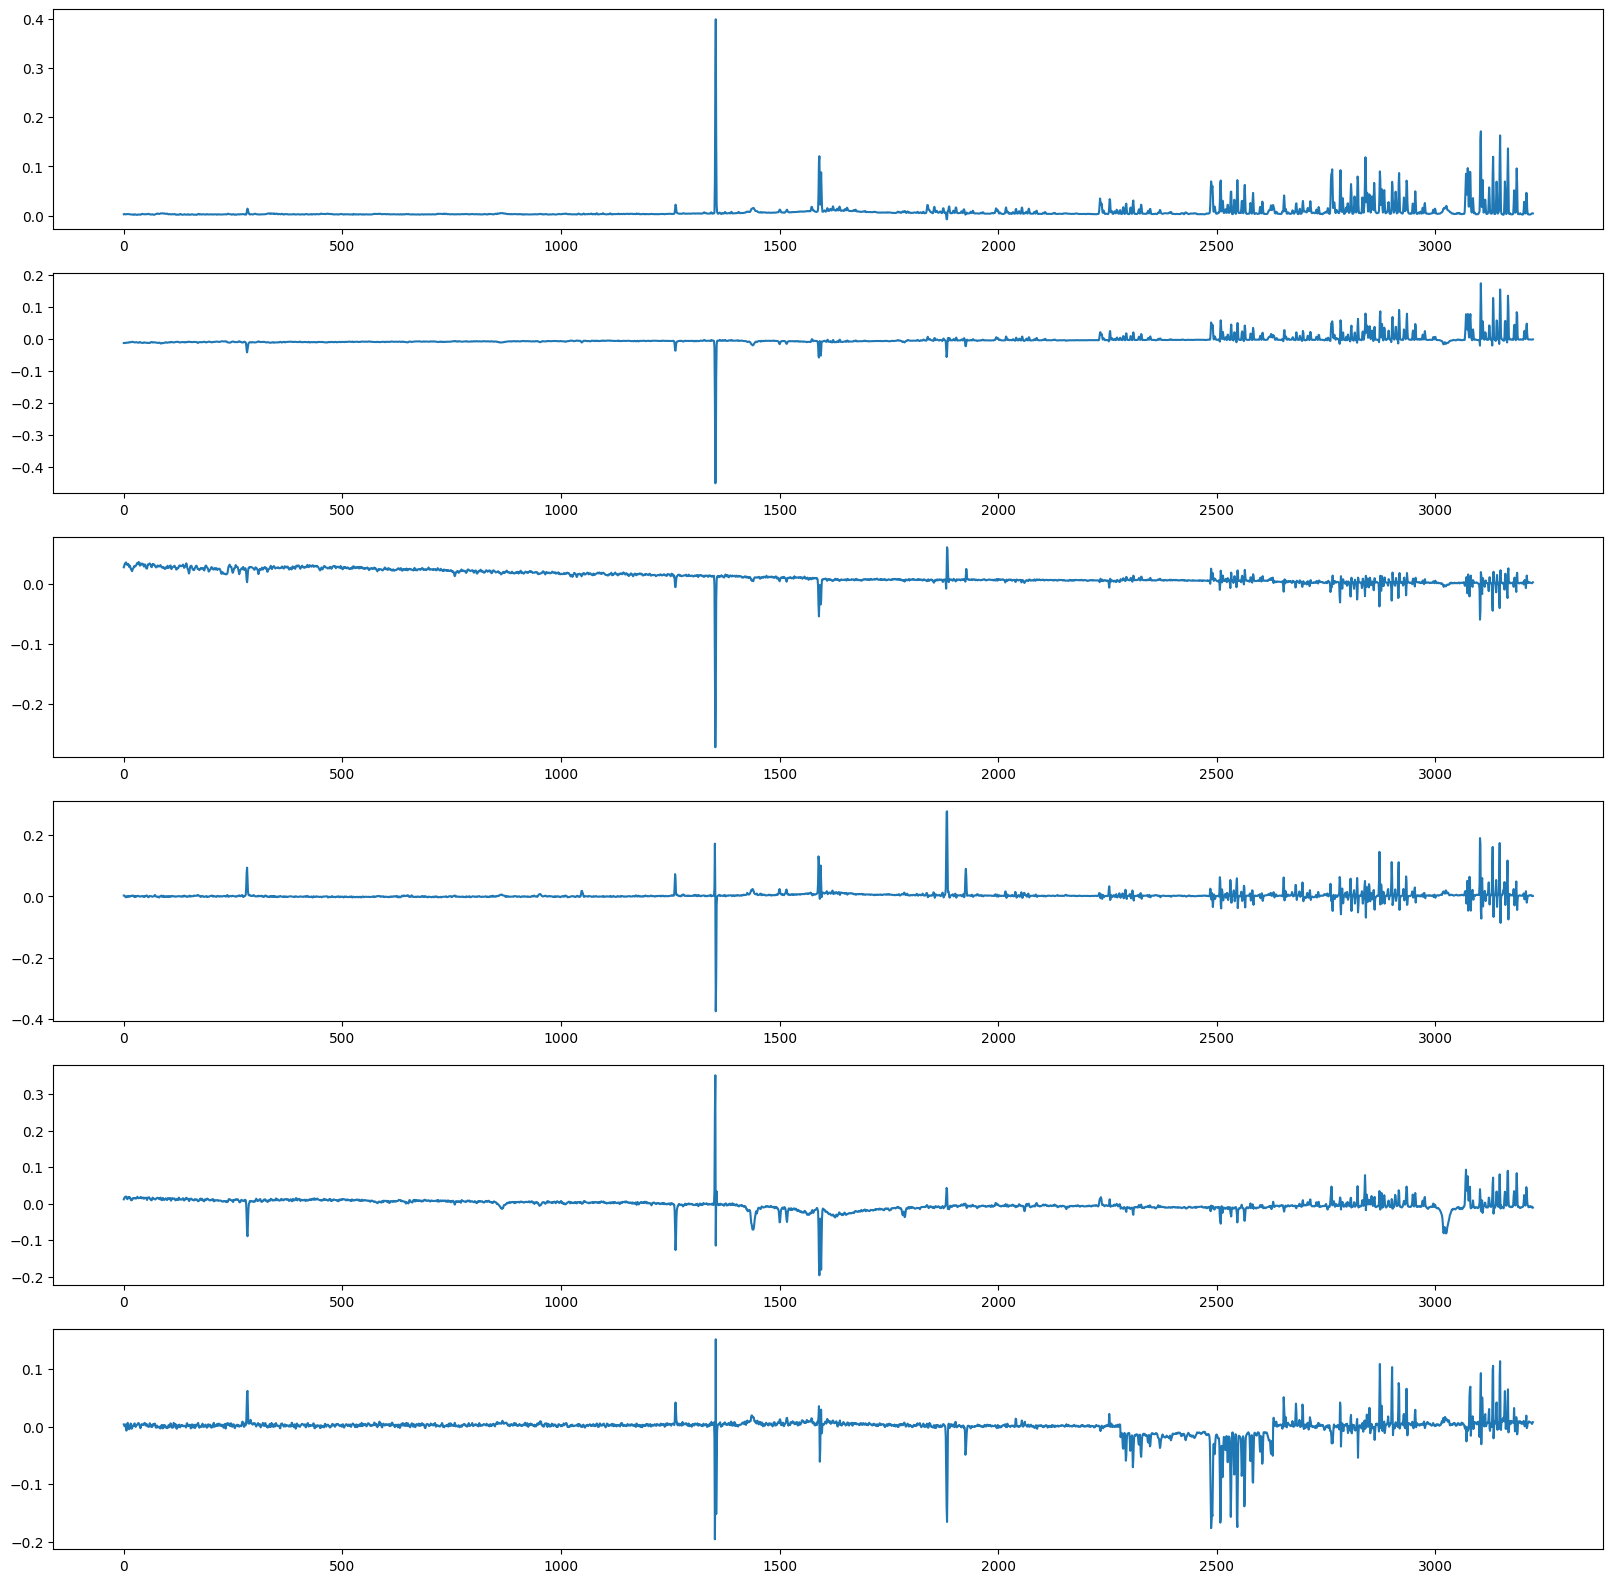

In [30]:
fig,ax=plt.subplots(nrows=6, ncols=1, figsize=(20,20))
ax[0].plot(pca_components[0])
ax[1].plot(pca_components[1])
ax[2].plot(pca_components[2])
ax[3].plot(pca_components[3])
ax[4].plot(pca_components[4])
ax[5].plot(pca_components[5])

